In [ ]:
# disable user warning to clear the console output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, Activation
from keras.optimizers import SGD
from keras import  backend as K

In [ ]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


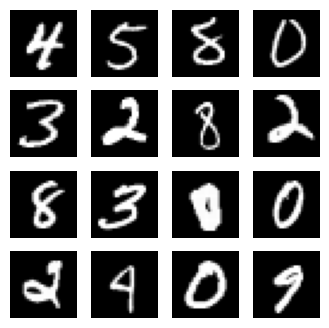

In [ ]:
import matplotlib.pyplot as plt # plotting library
%matplotlib inline

# sample 16 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=16)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 16 mnist digits
plt.figure(figsize=(4,4))
for i in range(len(indexes)):
    plt.subplot(4, 4, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
# import libraries neural networks
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical, plot_model

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
# normalize input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256

In [ ]:
# LeNet (http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)
model = Sequential()
model.add(Conv2D(filters=12, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 12)        120       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 24)        2616      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 24)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 864)               0         
                                                                 
 dense_3 (Dense)             (None, 256)              

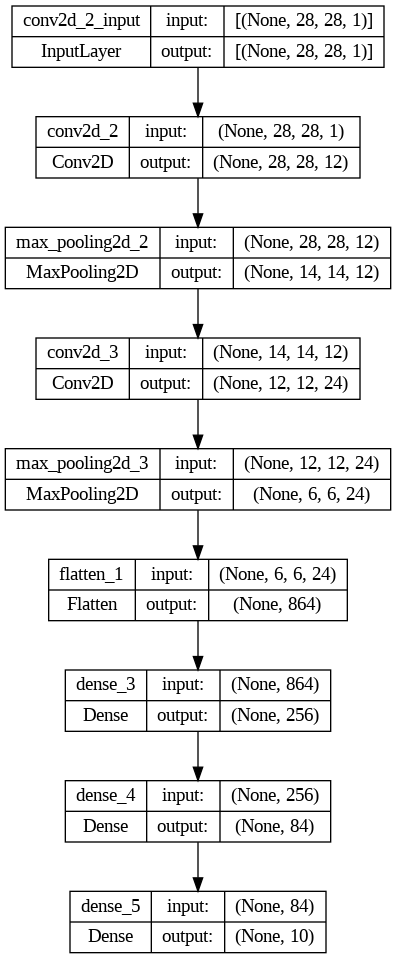

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
# define optimizer and train (fit) model on the train dataset
opt = SGD(learning_rate=0.05) # SGD = Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.4846 - accuracy: 0.8493
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1280 - accuracy: 0.9608
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0896 - accuracy: 0.9720
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0694 - accuracy: 0.9780
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0586 - accuracy: 0.9816
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0488 - accuracy: 0.9848
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0432 - accuracy: 0.9859
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0373 - accuracy: 0.9882
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0325 - accuracy: 0.9902
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0304 - accuracy: 0.9907

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.2f%%" % (100.0 * acc))

79/79 [==============================] - 1s 5ms/step - loss: 0.0423 - accuracy: 0.9858

Test accuracy: 98.58%
